# 로이터 뉴스 다중 분류

## 1. 단어수를 제한 두지 않고 머신러닝 기법으로 분류하기

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


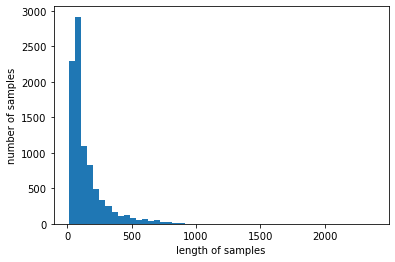

In [4]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

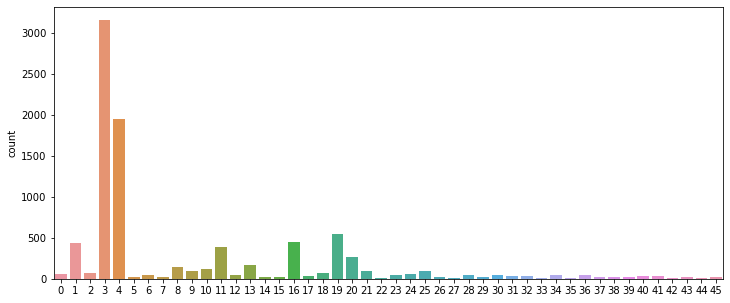

In [5]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [6]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [7]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [8]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [9]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [10]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [11]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [12]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [15]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


In [16]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

In [17]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [18]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.5997328584149599
f1_score: 0.06767886443611608


In [19]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) 
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.7649154051647373
f1_score: 0.4639854358945848


In [20]:
lr = LogisticRegression(C = 10000,penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) 
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.813446126447017
f1_score: 0.669532685925375


In [21]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.7773820124666073
f1_score: 0.5762216069486185


In [22]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.6211041852181657
f1_score: 0.15450055404800783


In [23]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) 
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.6544968833481746
f1_score: 0.2794631711818573


In [24]:
grbt = GradientBoostingClassifier(random_state=0)# verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.7702582368655387
f1_score: 0.572792648567258


In [25]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)
predicted = voting_classifier.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.8187889581478184
f1_score: 0.6577141879659247


## 2. 단어를 5000개로 제한하고 머신러닝 기법으로 분류하기

In [26]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [27]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = {index + 3 : word for word, index in word_index.items()}

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token


In [28]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [29]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [30]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [31]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


In [32]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)
x_test_dtm = dtmvector.transform(x_test) 
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

predicted = mod.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.6731967943009796
f1_score: 0.11017286132336847


In [33]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) 
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.7707034728406055
f1_score: 0.48203488372044917


In [34]:
lr = LogisticRegression(C = 10000,penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) 
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.8058771148708815
f1_score: 0.6427529674429183


In [35]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.7666963490650045
f1_score: 0.5774682817643806


In [36]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.6179875333926982
f1_score: 0.17794649395239356


In [37]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) 
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.701246660730187
f1_score: 0.35960899933378104


In [38]:
grbt = GradientBoostingClassifier(random_state=0)# verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.767586821015138
f1_score: 0.5791898381470704


In [39]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)
predicted = voting_classifier.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted, average = 'macro'))

accuracy: 0.8161175422974176
f1_score: 0.6642429726937643


Boosting과 Voting을 제외하고 단어 수를 5000개로 제한한 경우가 단어수를 제한하지 않은 경우보다 정확도나 f1_score가 높았다.  
그러나 Boosting 혹은 Voting을 할 경우 둘의 정확도나 f1_score는 거의 비슷한 곳에 수렴된다.    
그리고 Decision Tree는 단어수에 상관없이 가장 낮은 정확도를 갖고 있다.    
결론적으로 단어수 제한한 것이 단어수를 제한하지 않은 것보다 성능이 좋다고 얘기할 수 있다.     

## 3. LSTM으로 뉴스 분류하기

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [52]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [53]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 5000, test_split = 0.2)

In [54]:
max_len = 150
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [55]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [57]:
model = Sequential()
model.add(Embedding(5000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 120)         600000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5566      
Total params: 721,246
Trainable params: 721,246
Non-trainable params: 0
_________________________________________________________________


In [58]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)

In [59]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc', f1_m, precision_m, recall_m])

In [60]:
history = model.fit(X_train, y_train, batch_size=128, epochs=60, callbacks=[es, mc], validation_data=(X_val, y_val))

Epoch 1/60
57/57 [==============================] - ETA: 0s - loss: 2.6896 - acc: 0.3443 - f1_m: 0.0185 - precision_m: 0.0185 - recall_m: 0.0185 
Epoch 00001: val_acc did not improve from 0.68923
57/57 [==============================] - 1s 23ms/step - loss: 2.6896 - acc: 0.3443 - f1_m: 0.0185 - precision_m: 0.0185 - recall_m: 0.0185 - val_loss: 2.4100 - val_acc: 0.3255 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/60
54/57 [===========================>..] - ETA: 0s - loss: 2.1446 - acc: 0.4622 - f1_m: 0.3322 - precision_m: 0.7956 - recall_m: 0.2154 
Epoch 00002: val_acc did not improve from 0.68923
57/57 [==============================] - 1s 18ms/step - loss: 2.1388 - acc: 0.4633 - f1_m: 0.3404 - precision_m: 0.8033 - recall_m: 0.2220 - val_loss: 2.0903 - val_acc: 0.4396 - val_f1_m: 0.4180 - val_precision_m: 0.8307 - val_recall_m: 0.2803
Epoch 3/60
56/57 [============================>.] - ETA: 0s - loss: 1.8279 - acc: 0.5174 - f1_m: 0.5425 - pr

In [65]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print('accuracy:', accuracy)
print('f1_score:', f1_score)

accuracy: 0.6491540670394897
f1_score: 0.6789284348487854


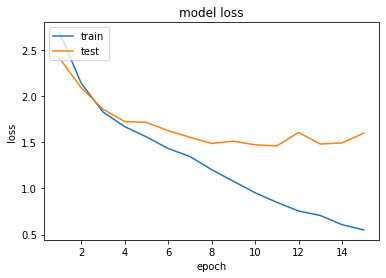

In [66]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

이번 실험에서의 정확도를 보면 DecisionTree나 Multinomial Naive Bayes를 제외하고 정확도가 매우 낮다.    
그러나 f1_score입장에서는 상황이 다르다. LSTM의 f1_score는 67%로 앞선 머신러닝보다 훨씬 성능이 좋다고 볼 수 있다.    
특히 이번 데이터 같은 경우 label간 불균형이 존재하기 때문에 f1_score가 정확도보다 더 좋은 지표라고 볼 수 있다.

## 4. 불용어를 제거하고 전처리과정까지 거친 상태에서 LSTM으로 다중분류하기

In [67]:
from nltk.corpus import stopwords

In [68]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 5000, test_split = 0.2)

In [69]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [70]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [71]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [72]:
decoded = []
for i in range(len(X_train)):
    t = ' '.join([index_to_word[index] for index in X_train[i]])
    decoded.append(t)

X_train = decoded

In [73]:
decoded = []
for i in range(len(X_test)):
    t = ' '.join([index_to_word[index] for index in X_test[i]])
    decoded.append(t)

X_test = decoded

In [74]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ",len(contractions))

정규화 사전의 수:  120


In [75]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [76]:
import re
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [77]:
X_train_text = []

# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in X_train:
    X_train_text.append(preprocess_sentence(s))

# 전처리 후 출력
X_train_text[:5]

['sos unk unk said result december acquisition space co expects earnings per share dlrs per share cts company said pretax net rise nine mln dlrs six mln dlrs rental operation revenues mln dlrs mln dlrs said cash flow per share year three dlrs reuter',
 'sos generale de banque sa lt unk unk lt heller overseas corp chicago taken pct stakes unk company sa unk factors generale de banque said statement gave financial details transaction sa unk unk turnover billion belgian francs reuter',
 'sos shr dlrs vs cts shr diluted dlrs vs cts net mln vs avg shrs mln vs mln year shr dlrs vs dlrs shr diluted dlrs vs dlrs net mln vs mln avg shrs mln vs mln note earnings per share reflect two one split effective january per share amounts calculated preferred stock dividends loss continuing operations qtr includes gains sale investments unk corp mln dlrs associated companies less writedowns investments national unk inc mln unk corp mln reuter',
 'sos farmers home administration agriculture department farm

In [78]:
X_test_text = []

# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in X_test:
    X_test_text.append(preprocess_sentence(s))

# 전처리 후 출력
X_test_text[:5]

['sos great atlantic pacific tea co said three year mln dlr capital program substantially increased unk growth expansion plans unk inc unk inc next two years said acquisition unk august unk december helped us achieve better expected results fourth quarter ended february net income continuing operations jumped pct mln dlrs cts share latest quarter sales increased pct billion dlrs gave details expanded capital program say completed first year program pct owned lt unk unk west germany reuter',
 'sos philippine sugar production crop year ending august set mln tonnes provisional mln tonnes year sugar regulatory administration unk chairman unk unk said unk told reuters survey current milling season ends next month showed estimate would almost certainly met said least mln tonnes crop would unk domestic consumption unk said tonnes would set aside sugar quota tonnes strategic reserves tonnes would sold world market said government approved long standing unk recommendation manufacture unk projec

In [79]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in X_train_text)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, X_train_text))/len(X_train_text)))

훈련용 뉴스의 최대 길이 :5828
훈련용 뉴스의 평균 길이 :548.8563794255177


In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer 
train_tokenizer = Tokenizer(num_words = 5000)
train_tokenizer.fit_on_texts(X_train_text)

In [81]:
X_train = train_tokenizer.texts_to_sequences(X_train_text)
len(X_train)

8982

In [82]:
X_test = train_tokenizer.texts_to_sequences(X_test_text)

In [83]:
X_train = pad_sequences(X_train, maxlen = 600, padding = 'pre')
X_test = pad_sequences(X_test, maxlen = 600, padding = 'pre')

In [84]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
len(y_train)

8982

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [86]:
model = Sequential()
model.add(Embedding(5000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 120)         600000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dense_2 (Dense)              (None, 46)                5566      
Total params: 721,246
Trainable params: 721,246
Non-trainable params: 0
_________________________________________________________________


In [87]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)

In [88]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc', f1_m, precision_m, recall_m])
history = model.fit(X_train, y_train, batch_size=128, epochs=60, callbacks=[es], validation_data=(X_val, y_val))

Epoch 1/60
56/57 [============================>.] - ETA: 0s - loss: 2.6837 - acc: 0.3384 - f1_m: 0.0264 - precision_m: 0.0264 - recall_m: 0.0264
Epoch 00001: val_acc did not improve from 0.68923
57/57 [==============================] - 4s 62ms/step - loss: 2.6819 - acc: 0.3389 - f1_m: 0.0259 - precision_m: 0.0260 - recall_m: 0.0259 - val_loss: 2.4421 - val_acc: 0.3255 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/60
56/57 [============================>.] - ETA: 0s - loss: 2.0955 - acc: 0.4612 - f1_m: 0.3207 - precision_m: 0.6122 - recall_m: 0.2203
Epoch 00002: val_acc did not improve from 0.68923
57/57 [==============================] - 3s 54ms/step - loss: 2.0946 - acc: 0.4615 - f1_m: 0.3242 - precision_m: 0.6137 - recall_m: 0.2236 - val_loss: 1.9470 - val_acc: 0.5058 - val_f1_m: 0.5395 - val_precision_m: 0.7640 - val_recall_m: 0.4183
Epoch 3/60
56/57 [============================>.] - ETA: 0s - loss: 1.7229 - acc: 0.5456 - f1_m: 0.5838 - prec

In [89]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print('accuracy:', accuracy)
print('f1_score:', f1_score)

accuracy: 0.6985752582550049
f1_score: 0.72484290599823


앞선 실험이 데이터가 불용어나 전처리과정을 거치치 않아 문제가 생겼다고 판단해서 전처리 이후 딥러닝 모델에 넣었다.    
정확도는 앞선 실험보다 좋게 나타났지만 다른 머신러닝 알고리즘보다 성능이 낮다는 것을 알 수 있다.    
그러나 f1_score는  72%로 성능이 더 개선되었다.   
딥러닝이 머신러닝보다 조금 더 성능이 좋다는 것이 입증되었다.